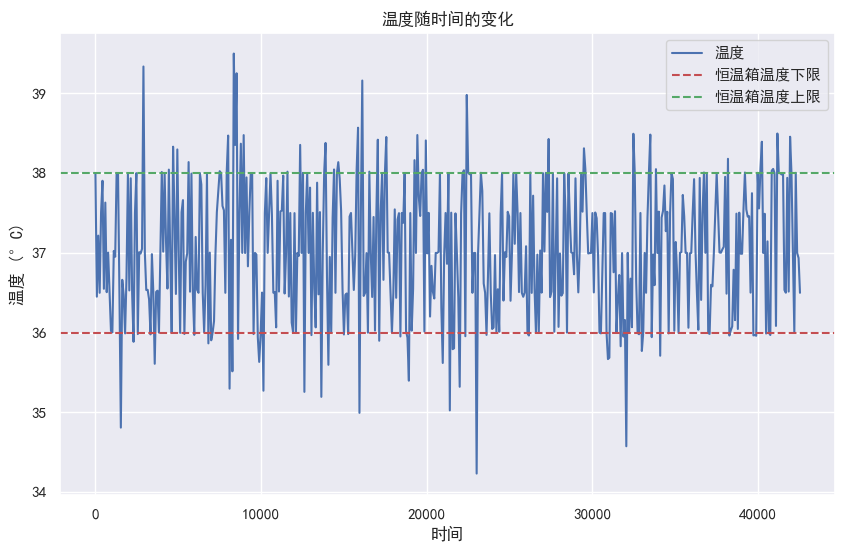

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# 加载数据
data = pd.read_csv('figure/temperature_data_1.csv', header=None, names=['温度'])
data['时间'] = data.index

# 使用插值来生成平滑曲线
x = data['时间']
y = data['温度']
f = interp1d(x, y, kind='cubic')  # 三次样条插值
x_smooth = np.linspace(x.min(), x.max(), 500)  # 生成更多的点来绘制平滑曲线
y_smooth = f(x_smooth)
# x_smooth = x  # 生成更多的点来绘制平滑曲线
# y_smooth = y


# 设置绘图样式
sns.set_theme(style="darkgrid")


# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建平滑曲线图
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, label="温度", color="b")

# 添加水平虚线
plt.axhline(y=36, color='r', linestyle='--', label="恒温箱温度下限")
plt.axhline(y=38, color='g', linestyle='--', label="恒温箱温度上限")

# 添加标题和标签（中文）
plt.title("温度随时间的变化")
plt.xlabel("时间")
plt.ylabel("温度 (°C)")

# 显示图例
plt.legend()
plt.savefig("temperature_variation.pdf", format='pdf')
# 显示图表
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# 读取 CSV 文件中的温度数据
# 假设 CSV 文件的路径是 "temperature_data.csv"，温度数据在第一列
df = pd.read_csv("temperature_data.csv")
temperature_data = df.iloc[:, 0].values  # 获取第一列的数据为温度数据

# 设定温度阈值范围
T_min = 36.0
T_max = 38.0

# 1. 计算在阈值范围内的比例
in_range = (temperature_data >= T_min) & (temperature_data <= T_max)
in_range_ratio = np.mean(in_range)

# 2. 计算偏离平均值（超出阈值范围的偏离程度）
out_of_range_deviation = np.where(temperature_data < T_min, T_min - temperature_data, 0) + \
                         np.where(temperature_data > T_max, temperature_data - T_max, 0)
average_deviation = np.mean(out_of_range_deviation[out_of_range_deviation > 0])

# 3. 计算恢复时间
# 找到超出阈值范围的温度数据索引
out_of_range_indices = np.where(~in_range)[0]
if len(out_of_range_indices) > 0:
    first_out_of_range_index = out_of_range_indices[0]  # 第一次超出阈值的索引
    recovery_indices = np.where(in_range[first_out_of_range_index:])[0]
    recovery_time = recovery_indices[0] if len(recovery_indices) > 0 else None
else:
    recovery_time = None  # 若未超出阈值，则恢复时间为 None

# 输出指标
print(f"在阈值范围内的时间比例: {in_range_ratio:.2f}")
print(f"超出阈值范围的偏离平均值: {average_deviation:.2f}")
print(f"恢复时间 (步数): {recovery_time}")

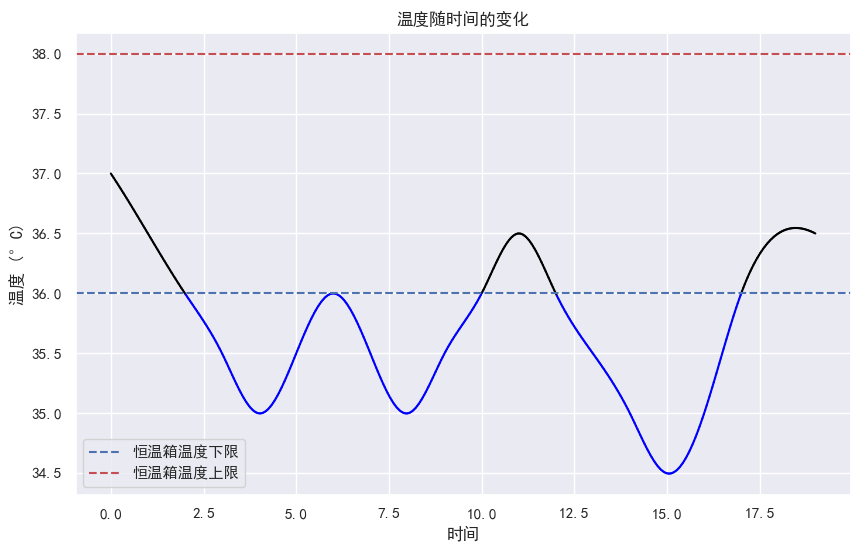

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# 加载数据
data = pd.read_csv('generated_temperature_data.csv', header=None, names=['温度'])
data['时间'] = data.index

# 使用插值来生成平滑曲线
x = data['时间']
y = data['温度']
f = interp1d(x, y, kind='cubic')  # 三次样条插值
x_smooth = np.linspace(x.min(), x.max(), 500)  # 生成更多的点来绘制平滑曲线
y_smooth = f(x_smooth)

# 设置绘图样式
sns.set_theme(style="darkgrid")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建平滑曲线图
plt.figure(figsize=(10, 6))

# 定义上下限
lower_limit = 36
upper_limit = 38

# 按上下限切分曲线并分别绘制不同颜色的部分
for i in range(len(x_smooth) - 1):
    if y_smooth[i] < lower_limit:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="blue")
    elif y_smooth[i] > upper_limit:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="red")
    else:
        plt.plot(x_smooth[i:i + 2], y_smooth[i:i + 2], color="black")

# 添加上下限的虚线
plt.axhline(y=lower_limit, color='b', linestyle='--', label="恒温箱温度下限")
plt.axhline(y=upper_limit, color='r', linestyle='--', label="恒温箱温度上限")

# 添加标题和标签（中文）
plt.title("温度随时间的变化")
plt.xlabel("时间")
plt.ylabel("温度 (°C)")

# 显示图例
plt.legend()
plt.savefig("temperature_variation.pdf", format='pdf')
plt.show()

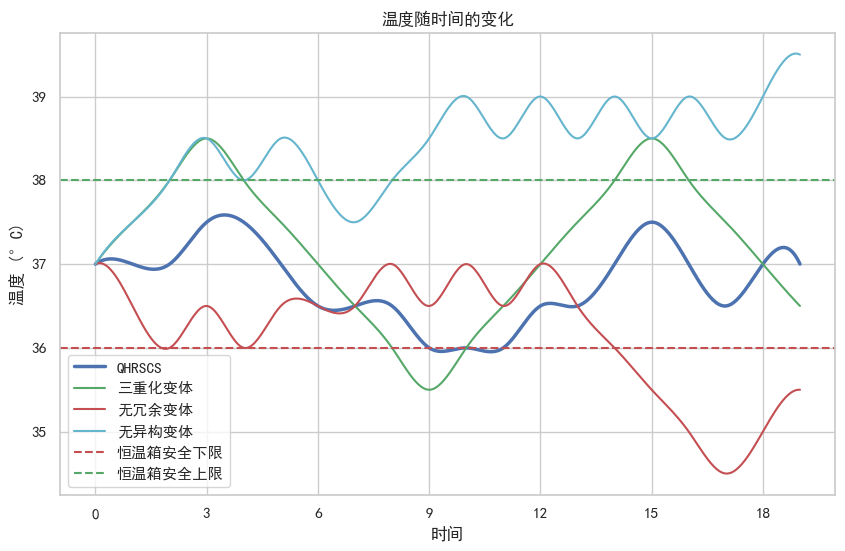

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

sns.set_theme(style="whitegrid")
# 设置字体为支持中文的字体，例如 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取4个CSV文件
data1 = pd.read_csv('figure/temperature_data.csv', header=None, names=['温度'])
data2 = pd.read_csv('figure/temperature_data2.csv', header=None, names=['温度'])
data3 = pd.read_csv('figure/temperature_data3.csv', header=None, names=['温度'])
data4 = pd.read_csv('figure/temperature_data4.csv', header=None, names=['温度'])

# 添加时间列
data1['时间'] = data1.index
data2['时间'] = data2.index
data3['时间'] = data3.index
data4['时间'] = data4.index


# 使用插值来生成平滑曲线
def smooth_data(data):
    x = data['时间']
    y = data['温度']
    f = interp1d(x, y, kind='cubic')  # 三次样条插值
    x_smooth = np.linspace(x.min(), x.max(), 500)  # 生成更多的点来绘制平滑曲线
    y_smooth = f(x_smooth)
    # return x, y
    return x_smooth, y_smooth

x_smooth1, y_smooth1 = smooth_data(data1)
x_smooth2, y_smooth2 = smooth_data(data2)
x_smooth3, y_smooth3 = smooth_data(data3)
x_smooth4, y_smooth4 = smooth_data(data4)

# 创建平滑曲线图
plt.figure(figsize=(10, 6))
plt.plot(x_smooth1, y_smooth1, label="QHRSCS", color="b", linewidth=2.5)
plt.plot(x_smooth2, y_smooth2, label="三重化变体", color="g")
plt.plot(x_smooth3, y_smooth3, label="无冗余变体", color="r")
plt.plot(x_smooth4, y_smooth4, label="无异构变体", color="c")

# 添加水平虚线
plt.axhline(y=36, color='r', linestyle='--', label="恒温箱安全下限")
plt.axhline(y=38, color='g', linestyle='--', label="恒温箱安全上限")

# 添加标题和标签（中文）
plt.title("温度随时间的变化")
plt.xlabel("时间")
plt.ylabel("温度 (°C)")

# 设置横轴刻度只显示整数
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# 显示图例
plt.legend()
plt.savefig("temperature_comparsion.pdf", format='pdf')
plt.show()


In [28]:
import csv
import random

def generate_temperature_data(initial_value, num_values, threshold_exceed_count, min_threshold=36.0, max_threshold=38.0):
    data = [initial_value]
    exceed_count = 0

    for _ in range(num_values - 1):
        if exceed_count < threshold_exceed_count:
            change = random.choice([-0.5, 0.5])
            new_value = data[-1] + change
            if new_value < min_threshold or new_value > max_threshold:
                exceed_count += 1
        else:
            change = random.choice([-0.5, 0.5, 0])
            new_value = data[-1] + change
            if new_value < min_threshold:
                new_value = min_threshold
            elif new_value > max_threshold:
                new_value = max_threshold

        data.append(new_value)

    return data

def save_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        for value in data:
            writer.writerow([value])

# 参数设置
initial_value = 37.0
num_values = 200  # 生成的数据个数
threshold_exceed_count = 4  # 超过阈值的次数

# 生成数据
temperature_data = generate_temperature_data(initial_value, num_values, threshold_exceed_count)

# 保存到CSV文件
save_to_csv(temperature_data, 'figure/generated_temperature_data3.csv')

print(f"生成的温度数据已保存到 'generated_temperature_data.csv'")

生成的温度数据已保存到 'generated_temperature_data.csv'
